In [126]:
import pandas as pd
import seaborn as srn
import statistics as sts

In [127]:
df = pd.DataFrame

In [128]:
#importar dados
dataset = pd.read_csv("limpezadados.csv", sep=",")
#visualizar
dataset.head()

,ID,Nome,Idade,E-mail,Cidade,Data_Cadastro,Valor_Compra,Status
0,1,Ana Silva,29.0,ana.silva@email.com,São Paulo,2024-01-10,250.75,ativo
1,2,Bruno Souza,35.0,bruno@email.com,Rio de Janeiro,2023-11-22,0.00,Inativo
2,3,Carla Lima,NaN,carla@email.com,Belo Horizonte,2024-03-05,150.00,Ativo
3,4,Diego Martins,42.0,NaN,São Paulo,2022-07-19,430.50,ativo
4,5,Elisa Rocha,23.0,elisa@email.com,Porto Alegre,2025-01-01,0.00,inativo


In [129]:
#tamanho 
dataset.shape

(7, 8)

In [130]:
#explorar dados categorias 
#estado
agrupado = dataset.groupby(['Cidade']).size()
agrupado

Cidade
Belo Horizonte    1
Porto Alegre      1
Recife            1
Rio de Janeiro    1
São Paulo         2
dtype: int64

<Axes: xlabel='Cidade'>

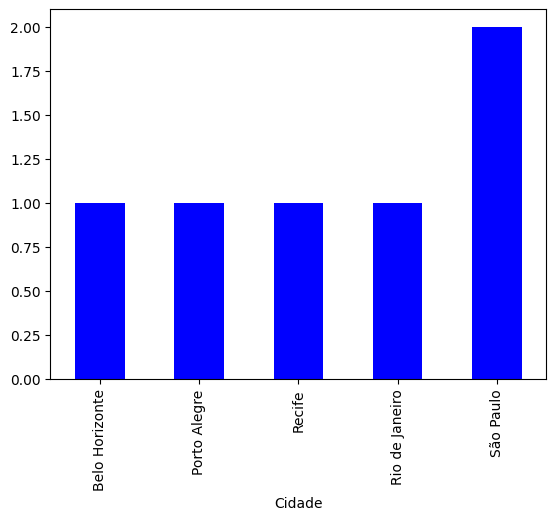

In [131]:
agrupado.plot.bar(color = 'blue')

In [132]:
#genero 
agrupado = dataset.groupby(['Status']).size()
agrupado

Status
ATIVO      1
Ativo      2
Inativo    1
ativo      2
inativo    1
dtype: int64

<Axes: xlabel='Status'>

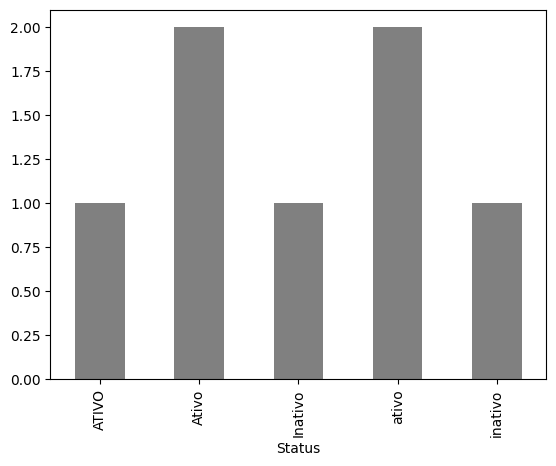

In [133]:
agrupado.plot.bar(color='gray')

In [134]:
#explorar colunas numéricos
#score
dataset['Valor_Compra'].describe()

count      6.000000
mean     185.241667
std      169.310958
min        0.000000
25%       37.500000
50%      200.375000
75%      272.837500
max      430.500000
Name: Valor_Compra, dtype: float64

Text(0.5, 1.0, 'Cidade')

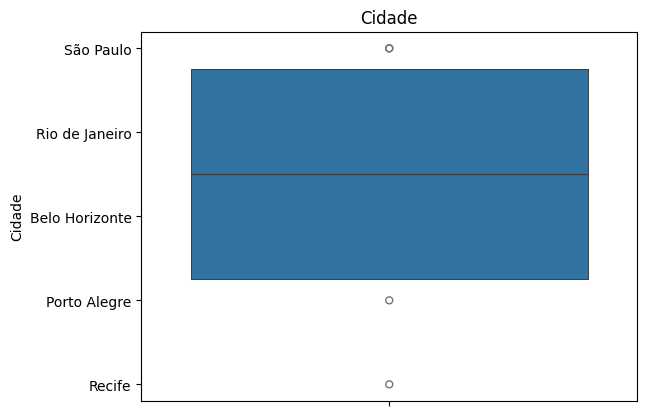

In [135]:
srn.boxenplot(dataset['Cidade']).set_title('Cidade')

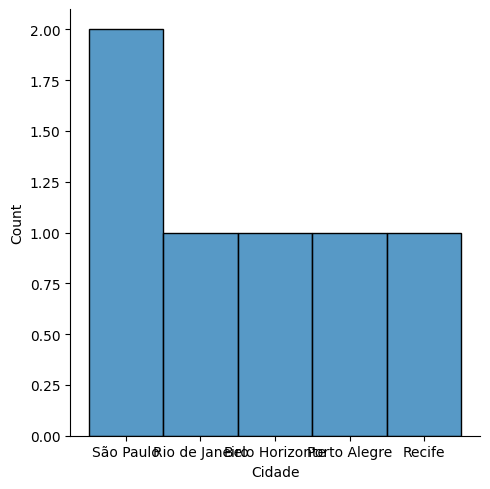

In [136]:
srn.displot(dataset['Cidade']).set_titles('Cidade')